In [215]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings(action='ignore')  # 경고 메시지를 무시



In [216]:

# 시스템 환경에 따라 폰트를 자동으로 설정해주는 함수
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        return "AppleGothic"
    elif system_name == "Windows":
        return "Malgun Gothic"
    else:
        # Linux (Colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        return "NanumBarunGothic"

# 한글 폰트 적용
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 레티나 디스플레이 설정 (선명하게)
%config InlineBackend.figure_format = 'retina'



In [217]:

# 파일 경로
file_paths = {
    "우울감경험률": "data/우울감경험률_2008-2024_.csv",
    "우울증상유병률": "data/우울증상유병률_2017-2024_.csv",
    "정신상담경험": "data/정신상담경험.csv",
    "1인가구통계": "data/성별_연령별_교육정도별_1인가구_일반가구_시군구_20250625112008.csv"
}

In [218]:
우울감_data = pd.read_csv(file_paths["우울감경험률"], header=9)




In [219]:
# 파일별 첫 몇 줄을 미리 확인
previews = {}
for name, path in file_paths.items():
    try:
        if path.endswith('.csv'):
            df = pd.read_excel(path, nrows=5)
        else:
            df = pd.read_csv(path, nrows=5, encoding='utf-8')
        previews[name] = df
    except Exception as e:
        previews[name] = f"Error reading file: {e}"

previews

{'우울감경험률': 'Error reading file: Excel file format cannot be determined, you must specify an engine manually.',
 '우울증상유병률': 'Error reading file: Excel file format cannot be determined, you must specify an engine manually.',
 '정신상담경험': 'Error reading file: Excel file format cannot be determined, you must specify an engine manually.',
 '1인가구통계': 'Error reading file: Excel file format cannot be determined, you must specify an engine manually.'}

In [220]:
우울감_data.head()

,구분,Unnamed: 1,Unnamed: 2,2008,2009,2010,2011,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,95% CI
0,서울,N,(명),"21,916","23,171","22,871","23,109","23,055","23,135","23,024",...,"22,933","22,945","22,903","22,909","22,912","22,923","22,941","22,928","22,904",NaN
1,NaN,전체,(조율),8.2(0.2),7.9(0.2),6.8(0.2),7.0(0.2),6.8(0.2),7.1(0.2),8.3(0.2),...,7.0(0.2),7.2(0.2),5.1(0.2),6.5(0.2),6.3(0.2),7.0(0.2),7.3(0.2),8.4(0.2),7.5(0.2),7.1-7.9
2,NaN,NaN,(표준화율),8.1(0.2),7.8(0.2),6.7(0.2),6.9(0.2),6.7(0.2),7.0(0.2),8.1(0.2),...,6.9(0.2),7.1(0.2),4.9(0.2),6.5(0.2),6.3(0.2),6.8(0.2),7.1(0.2),8.3(0.2),7.3(0.2),6.9-7.8
3,NaN,남,NaN,5.3(0.2),5.3(0.2),4.6(0.2),4.9(0.2),4.9(0.2),5.0(0.2),6.2(0.3),...,5.4(0.2),5.6(0.2),3.6(0.2),5.0(0.2),4.8(0.2),5.2(0.2),5.3(0.2),6.3(0.3),6.0(0.3),5.5-6.5
4,NaN,여,NaN,10.9(0.3),10.3(0.3),9.0(0.3),9.1(0.3),8.7(0.3),9.1(0.3),10.3(0.3),...,8.4(0.3),8.7(0.3),6.4(0.2),8.0(0.3),7.7(0.3),8.6(0.3),9.1(0.3),10.2(0.3),8.8(0.3),8.3-9.4


In [221]:
우울감_data.describe()

,구분,Unnamed: 1,Unnamed: 2,2008,2009,2010,2011,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,95% CI
count,17,170,51,176,176,176,176,187,187,187,...,187,187,187,187,187,187,187,187,187,170
unique,17,10,3,166,159,148,144,155,163,173,...,161,169,160,166,163,166,166,171,161,164
top,서울,N,(명),8.0(0.4),5.3(0.2),3.7(0.4),4.9(0.8),5.6(0.3),5.8(0.3),6.4(0.4),...,5.5(0.5),5.4(0.4),4.8(0.4),5.3(0.9),4.8(0.8),6.9(0.3),8.1(0.5),8.6(0.5),5.4(0.7),5.5-6.5
freq,1,17,17,3,2,3,3,5,4,3,...,3,3,3,3,3,3,3,3,4,2


In [222]:
우울감_data.index

RangeIndex(start=0, stop=187, step=1)

In [223]:
우울감_data.columns

Index(['구분', 'Unnamed: 1', 'Unnamed: 2', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024', '95% CI'],
      dtype='object')

In [224]:
# 시도명이 들어간 행 찾기
시도_행 = 우울감_data["구분"].dropna().reset_index()
시도_행.columns = ["index", "시도명"]



for i in range(len(시도_행)):
    start_idx = 시도_행.loc[i, "index"]
    시도명 = 시도_행.loc[i, "시도명"]
    end_idx = 시도_행.loc[i + 1, "index"] if i + 1 < len(시도_행) else len(우울감_data)
    
    block = 우울감_data.iloc[start_idx:end_idx].copy()
    block["Unnamed: 1"] = block["Unnamed: 1"].astype(str).str.strip()
    block["Unnamed: 2"] = block["Unnamed: 2"].astype(str).str.strip()
    
    candidates = block[
        (block["Unnamed: 1"] == "전체") &
        (block["Unnamed: 2"] == "(표준화율)")
    ]
    
    print(f"🟡 시도: {시도명} / 블록 범위: {start_idx} ~ {end_idx} / 추출된 행 수: {len(candidates)}")
    if not candidates.empty:
        display(candidates.head())


🟡 시도: 서울 / 블록 범위: 0 ~ 11 / 추출된 행 수: 0
🟡 시도: 부산 / 블록 범위: 11 ~ 22 / 추출된 행 수: 0
🟡 시도: 대구 / 블록 범위: 22 ~ 33 / 추출된 행 수: 0
🟡 시도: 인천 / 블록 범위: 33 ~ 44 / 추출된 행 수: 0
🟡 시도: 광주 / 블록 범위: 44 ~ 55 / 추출된 행 수: 0
🟡 시도: 대전 / 블록 범위: 55 ~ 66 / 추출된 행 수: 0
🟡 시도: 울산 / 블록 범위: 66 ~ 77 / 추출된 행 수: 0
🟡 시도: 세종 / 블록 범위: 77 ~ 88 / 추출된 행 수: 0
🟡 시도: 경기 / 블록 범위: 88 ~ 99 / 추출된 행 수: 0
🟡 시도: 강원 / 블록 범위: 99 ~ 110 / 추출된 행 수: 0
🟡 시도: 충북 / 블록 범위: 110 ~ 121 / 추출된 행 수: 0
🟡 시도: 충남 / 블록 범위: 121 ~ 132 / 추출된 행 수: 0
🟡 시도: 전북 / 블록 범위: 132 ~ 143 / 추출된 행 수: 0
🟡 시도: 전남 / 블록 범위: 143 ~ 154 / 추출된 행 수: 0
🟡 시도: 경북 / 블록 범위: 154 ~ 165 / 추출된 행 수: 0
🟡 시도: 경남 / 블록 범위: 165 ~ 176 / 추출된 행 수: 0
🟡 시도: 제주 / 블록 범위: 176 ~ 187 / 추출된 행 수: 0


In [225]:
for i in range(len(시도_행)):
    start_idx = 시도_행.loc[i, "index"]
    시도명 = 시도_행.loc[i, "시도명"]
    end_idx = 시도_행.loc[i + 1, "index"] if i + 1 < len(시도_행) else len(우울감_data)
    
    block = 우울감_data.iloc[start_idx:end_idx].copy()
    block["Unnamed: 1"] = block["Unnamed: 1"].astype(str).str.strip()
    block["Unnamed: 2"] = block["Unnamed: 2"].astype(str).str.strip()
    
    print(f"\n🟢 시도: {시도명}")
    print("▶️ Unnamed: 1 (세부구분):", block["Unnamed: 1"].unique())
    print("▶️ Unnamed: 2 (추가구분):", block["Unnamed: 2"].unique())



🟢 시도: 서울
▶️ Unnamed: 1 (세부구분): ['N' '전체' 'nan' '남' '여' '19-29' '30-39' '40-49' '50-59' '60-69' '70이상']
▶️ Unnamed: 2 (추가구분): ['(명)' '(조율)' '(표준화율)' 'nan']

🟢 시도: 부산
▶️ Unnamed: 1 (세부구분): ['N' '전체' 'nan' '남' '여' '19-29' '30-39' '40-49' '50-59' '60-69' '70이상']
▶️ Unnamed: 2 (추가구분): ['(명)' '(조율)' '(표준화율)' 'nan']

🟢 시도: 대구
▶️ Unnamed: 1 (세부구분): ['N' '전체' 'nan' '남' '여' '19-29' '30-39' '40-49' '50-59' '60-69' '70이상']
▶️ Unnamed: 2 (추가구분): ['(명)' '(조율)' '(표준화율)' 'nan']

🟢 시도: 인천
▶️ Unnamed: 1 (세부구분): ['N' '전체' 'nan' '남' '여' '19-29' '30-39' '40-49' '50-59' '60-69' '70이상']
▶️ Unnamed: 2 (추가구분): ['(명)' '(조율)' '(표준화율)' 'nan']

🟢 시도: 광주
▶️ Unnamed: 1 (세부구분): ['N' '전체' 'nan' '남' '여' '19-29' '30-39' '40-49' '50-59' '60-69' '70이상']
▶️ Unnamed: 2 (추가구분): ['(명)' '(조율)' '(표준화율)' 'nan']

🟢 시도: 대전
▶️ Unnamed: 1 (세부구분): ['N' '전체' 'nan' '남' '여' '19-29' '30-39' '40-49' '50-59' '60-69' '70이상']
▶️ Unnamed: 2 (추가구분): ['(명)' '(조율)' '(표준화율)' 'nan']

🟢 시도: 울산
▶️ Unnamed: 1 (세부구분): ['N' '전체' 'nan' '남' '여' '19-29' 

In [226]:
# 시도별 전체 표준화율만 추출
시도별_표준화율_리스트 = []

for i in range(len(시도_행)):
    start_idx = 시도_행.loc[i, "index"]
    시도명 = 시도_행.loc[i, "시도명"]
    end_idx = 시도_행.loc[i + 1, "index"] if i + 1 < len(시도_행) else len(우울감_data)

    block = 우울감_data.iloc[start_idx:end_idx].copy()
    block["Unnamed: 1"] = block["Unnamed: 1"].astype(str).str.strip()
    block["Unnamed: 2"] = block["Unnamed: 2"].astype(str).str.strip()
    
    # 전체 조건 생략하고 '표준화율'인 행만 추출
    match = block[block["Unnamed: 2"] == "(표준화율)"]
    
    if not match.empty:
        match.insert(0, "시도", 시도명)
        시도별_표준화율_리스트.append(match)

# 병합 후 연도별 열만 추출
시도별_표준화율_df = pd.concat(시도별_표준화율_리스트, ignore_index=True)

# 연도 컬럼만 숫자형으로 정리
연도컬럼 = [col for col in 시도별_표준화율_df.columns if str(col).isdigit()]
시도별_표준화율_df = 시도별_표준화율_df[["시도"] + 연도컬럼]
시도별_표준화율_df

,시도,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,서울,8.1(0.2),7.8(0.2),6.7(0.2),6.9(0.2),6.7(0.2),7.0(0.2),8.1(0.2),7.8(0.2),6.9(0.2),7.1(0.2),4.9(0.2),6.5(0.2),6.3(0.2),6.8(0.2),7.1(0.2),8.3(0.2),7.3(0.2)
1,부산,6.8(0.2),6.1(0.2),4.8(0.2),5.4(0.2),4.9(0.2),4.8(0.2),5.8(0.2),5.2(0.2),5.8(0.2),6.0(0.2),6.0(0.2),5.5(0.2),5.7(0.3),6.9(0.3),7.5(0.3),7.7(0.3),6.3(0.3)
2,대구,7.2(0.3),8.2(0.3),5.4(0.3),4.1(0.2),5.6(0.3),5.3(0.3),5.4(0.3),5.1(0.3),4.9(0.3),4.6(0.3),3.4(0.2),5.4(0.3),5.4(0.3),5.8(0.3),6.1(0.3),6.7(0.4),5.4(0.3)
3,인천,8.8(0.4),9.8(0.4),6.0(0.3),5.2(0.3),5.6(0.3),7.5(0.3),8.3(0.3),7.9(0.3),6.9(0.3),7.2(0.3),8.1(0.3),7.6(0.3),7.9(0.4),8.8(0.4),8.0(0.4),6.5(0.3),6.4(0.3)
4,광주,8.7(0.5),7.0(0.4),5.0(0.3),5.4(0.4),6.1(0.4),4.6(0.3),6.4(0.4),5.0(0.4),4.6(0.3),5.4(0.4),4.5(0.3),5.4(0.4),4.5(0.3),6.3(0.4),6.3(0.4),7.0(0.4),5.0(0.4)
5,대전,6.8(0.4),7.6(0.4),6.0(0.4),4.3(0.3),4.3(0.3),6.8(0.4),5.9(0.4),7.6(0.4),7.4(0.5),5.6(0.4),4.7(0.4),4.2(0.3),4.8(0.4),6.5(0.4),6.7(0.4),7.9(0.4),5.9(0.4)
6,울산,5.6(0.4),5.4(0.3),5.5(0.3),3.7(0.3),3.1(0.3),3.6(0.3),5.3(0.4),4.8(0.4),3.8(0.3),4.4(0.3),4.8(0.4),5.4(0.4),5.5(0.4),6.3(0.4),7.8(0.5),8.6(0.5),7.2(0.4)
7,세종,NaN,NaN,NaN,NaN,4.7(0.9),4.9(0.8),6.9(0.9),7.5(1.1),4.9(0.7),7.7(1.2),6.1(0.8),4.9(0.9),6.1(0.8),6.6(1.0),4.1(0.7),8.8(1.1),7.4(0.9)
8,경기,9.2(0.2),8.2(0.2),5.8(0.1),6.2(0.1),5.4(0.1),6.5(0.1),6.9(0.1),6.3(0.1),6.5(0.1),6.9(0.2),6.2(0.1),6.5(0.1),6.3(0.1),7.1(0.1),7.1(0.1),7.7(0.2),6.9(0.1)
9,강원,8.7(0.3),9.1(0.3),6.3(0.3),4.5(0.3),4.8(0.3),5.8(0.3),8.1(0.3),6.1(0.3),5.3(0.3),6.8(0.4),5.3(0.3),5.7(0.4),5.7(0.3),7.2(0.4),7.1(0.4),8.6(0.4),6.3(0.4)


In [227]:
시도별_표준화율_df.describe().round(2)

,시도,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,17,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17
unique,17,15,16,15,15,16,16,16,17,16,17,16,14,16,16,17,17,17
top,서울,8.0(0.4),7.8(0.2),3.9(0.2),4.0(0.2),5.6(0.3),4.8(0.2),6.4(0.4),7.8(0.2),5.8(0.2),7.1(0.2),5.3(0.3),5.4(0.4),5.7(0.3),6.3(0.4),7.1(0.2),8.3(0.2),7.3(0.2)
freq,1,2,1,2,2,2,2,2,1,2,1,2,2,2,2,1,1,1


In [228]:
시도별_표준화율_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      17 non-null     object
 1   2008    16 non-null     object
 2   2009    16 non-null     object
 3   2010    16 non-null     object
 4   2011    16 non-null     object
 5   2012    17 non-null     object
 6   2013    17 non-null     object
 7   2014    17 non-null     object
 8   2015    17 non-null     object
 9   2016    17 non-null     object
 10  2017    17 non-null     object
 11  2018    17 non-null     object
 12  2019    17 non-null     object
 13  2020    17 non-null     object
 14  2021    17 non-null     object
 15  2022    17 non-null     object
 16  2023    17 non-null     object
 17  2024    17 non-null     object
dtypes: object(18)
memory usage: 2.5+ KB


In [229]:
시도별_연령별_19_29_리스트 = []

for i in range(len(시도_행)):
    start_idx = 시도_행.loc[i, "index"]
    시도명 = 시도_행.loc[i, "시도명"]
    end_idx = 시도_행.loc[i + 1, "index"] if i + 1 < len(시도_행) else len(우울감_data)

    block = 우울감_data.iloc[start_idx:end_idx].copy()
    block["Unnamed: 1"] = block["Unnamed: 1"].astype(str).str.strip()
    
    # '19-29' 행 추출
    match = block[block["Unnamed: 1"] == "19-29"]

    if not match.empty:
        match.insert(0, "시도", 시도명)
        시도별_연령별_19_29_리스트.append(match)

# 병합
시도별_19_29_df = pd.concat(시도별_연령별_19_29_리스트, ignore_index=True)

# 연도 컬럼만 추출
연도컬럼 = [col for col in 시도별_19_29_df.columns if str(col).isdigit()]
시도별_19_29_df = 시도별_19_29_df[["시도"] + 연도컬럼]

# 괄호 제거 및 float로 변환
for col in 연도컬럼:
    시도별_19_29_df[col] = 시도별_19_29_df[col].astype(str).str.extract(r"([\d\.]+)").astype(float)

시도별_19_29_df.head()


,시도,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,서울,6.2,6.6,6.1,6.9,7.5,6.2,7.2,8.0,7.7,7.9,4.7,7.4,7.3,7.1,8.1,8.8,7.9
1,부산,5.8,4.3,4.7,4.8,3.6,4.0,4.9,4.7,5.5,5.0,4.5,3.9,6.2,7.0,5.4,6.6,5.4
2,대구,5.2,7.9,4.0,3.0,5.2,4.4,4.6,4.4,4.6,5.3,3.5,5.0,6.1,6.1,5.3,5.2,3.8
3,인천,6.7,6.4,4.6,5.2,6.0,5.9,5.6,6.1,4.9,6.7,7.0,6.7,6.7,8.3,7.3,5.4,4.9
4,광주,8.7,6.0,5.3,6.7,5.1,4.1,5.4,5.7,5.6,5.4,5.6,4.4,4.1,6.6,5.2,5.9,4.2


In [230]:
# 모든 연도 컬럼에서 하나라도 NaN이면 해당 시도 제거
시도별_19_29_df = 시도별_19_29_df.dropna()
시도별_19_29_df = 시도별_19_29_df[시도별_19_29_df["시도"] != "세종"]
시도별_19_29_df

,시도,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,서울,6.2,6.6,6.1,6.9,7.5,6.2,7.2,8.0,7.7,7.9,4.7,7.4,7.3,7.1,8.1,8.8,7.9
1,부산,5.8,4.3,4.7,4.8,3.6,4.0,4.9,4.7,5.5,5.0,4.5,3.9,6.2,7.0,5.4,6.6,5.4
2,대구,5.2,7.9,4.0,3.0,5.2,4.4,4.6,4.4,4.6,5.3,3.5,5.0,6.1,6.1,5.3,5.2,3.8
3,인천,6.7,6.4,4.6,5.2,6.0,5.9,5.6,6.1,4.9,6.7,7.0,6.7,6.7,8.3,7.3,5.4,4.9
4,광주,8.7,6.0,5.3,6.7,5.1,4.1,5.4,5.7,5.6,5.4,5.6,4.4,4.1,6.6,5.2,5.9,4.2
5,대전,4.6,6.0,4.5,3.4,5.0,5.7,4.8,7.6,7.7,8.4,4.3,4.2,4.3,3.9,5.7,7.2,5.6
6,울산,2.6,4.1,3.1,2.8,2.6,3.2,4.4,3.9,3.2,3.7,5.9,5.6,5.1,5.2,6.4,9.8,6.1
8,경기,7.6,6.9,5.1,5.5,4.4,5.8,6.0,5.8,6.2,7.4,5.1,5.4,6.5,6.0,5.8,6.8,5.7
9,강원,5.9,8.2,5.8,4.1,4.4,5.8,6.4,5.2,5.7,5.8,3.5,5.9,6.0,5.7,7.0,8.7,4.9
10,충북,5.2,4.0,3.3,3.3,4.8,7.2,8.9,9.2,5.7,5.3,4.6,5.7,5.7,5.7,6.7,6.4,6.3


In [231]:
# 모든 연도 컬럼에 대해 괄호 제거 및 숫자만 추출
for col in 연도컬럼:
    시도별_19_29_df[col] = 시도별_19_29_df[col].astype(str).str.extract(r"([\d\.]+)").astype(float)
시도별_19_29_df 

,시도,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,서울,6.2,6.6,6.1,6.9,7.5,6.2,7.2,8.0,7.7,7.9,4.7,7.4,7.3,7.1,8.1,8.8,7.9
1,부산,5.8,4.3,4.7,4.8,3.6,4.0,4.9,4.7,5.5,5.0,4.5,3.9,6.2,7.0,5.4,6.6,5.4
2,대구,5.2,7.9,4.0,3.0,5.2,4.4,4.6,4.4,4.6,5.3,3.5,5.0,6.1,6.1,5.3,5.2,3.8
3,인천,6.7,6.4,4.6,5.2,6.0,5.9,5.6,6.1,4.9,6.7,7.0,6.7,6.7,8.3,7.3,5.4,4.9
4,광주,8.7,6.0,5.3,6.7,5.1,4.1,5.4,5.7,5.6,5.4,5.6,4.4,4.1,6.6,5.2,5.9,4.2
5,대전,4.6,6.0,4.5,3.4,5.0,5.7,4.8,7.6,7.7,8.4,4.3,4.2,4.3,3.9,5.7,7.2,5.6
6,울산,2.6,4.1,3.1,2.8,2.6,3.2,4.4,3.9,3.2,3.7,5.9,5.6,5.1,5.2,6.4,9.8,6.1
8,경기,7.6,6.9,5.1,5.5,4.4,5.8,6.0,5.8,6.2,7.4,5.1,5.4,6.5,6.0,5.8,6.8,5.7
9,강원,5.9,8.2,5.8,4.1,4.4,5.8,6.4,5.2,5.7,5.8,3.5,5.9,6.0,5.7,7.0,8.7,4.9
10,충북,5.2,4.0,3.3,3.3,4.8,7.2,8.9,9.2,5.7,5.3,4.6,5.7,5.7,5.7,6.7,6.4,6.3


In [232]:
# 연도별 합계 계산
연도별_합계 = 시도별_19_29_df[연도컬럼].sum()

# 보기 좋게 DataFrame으로 정리
연도별_합계_df = 연도별_합계.reset_index()
연도별_합계_df.columns = ['연도', '우울감경험률_합계']

# 연도는 문자열 → 정수형 변환
연도별_합계_df['연도'] = 연도별_합계_df['연도'].astype(int)

# 확인
연도별_합계_df


,연도,우울감경험률_합계
0,2008,87.8
1,2009,91.8
2,2010,70.8
3,2011,67.6
4,2012,73.1
5,2013,81.9
6,2014,95.8
7,2015,93.4
8,2016,89.8
9,2017,95.1


In [288]:
# 연도별 평균 계산
연도별_평균 = 시도별_19_29_df[연도컬럼].mean().round(1)

# 보기 좋게 DataFrame으로 정리
연도별_평균_df = 연도별_평균.reset_index()
연도별_평균_df.columns = ['연도', '우울감경험률_평균']

# 연도는 문자열 → 정수형 변환
연도별_평균_df['연도'] = 연도별_평균_df['연도'].astype(int)

# 확인
연도별_평균_df = 연도별_평균_df[:-1]
연도별_평균_df


,연도,우울감경험률_평균
0,2008,5.5
1,2009,5.7
2,2010,4.4
3,2011,4.2
4,2012,4.6
5,2013,5.1
6,2014,6.0
7,2015,5.8
8,2016,5.6
9,2017,5.9


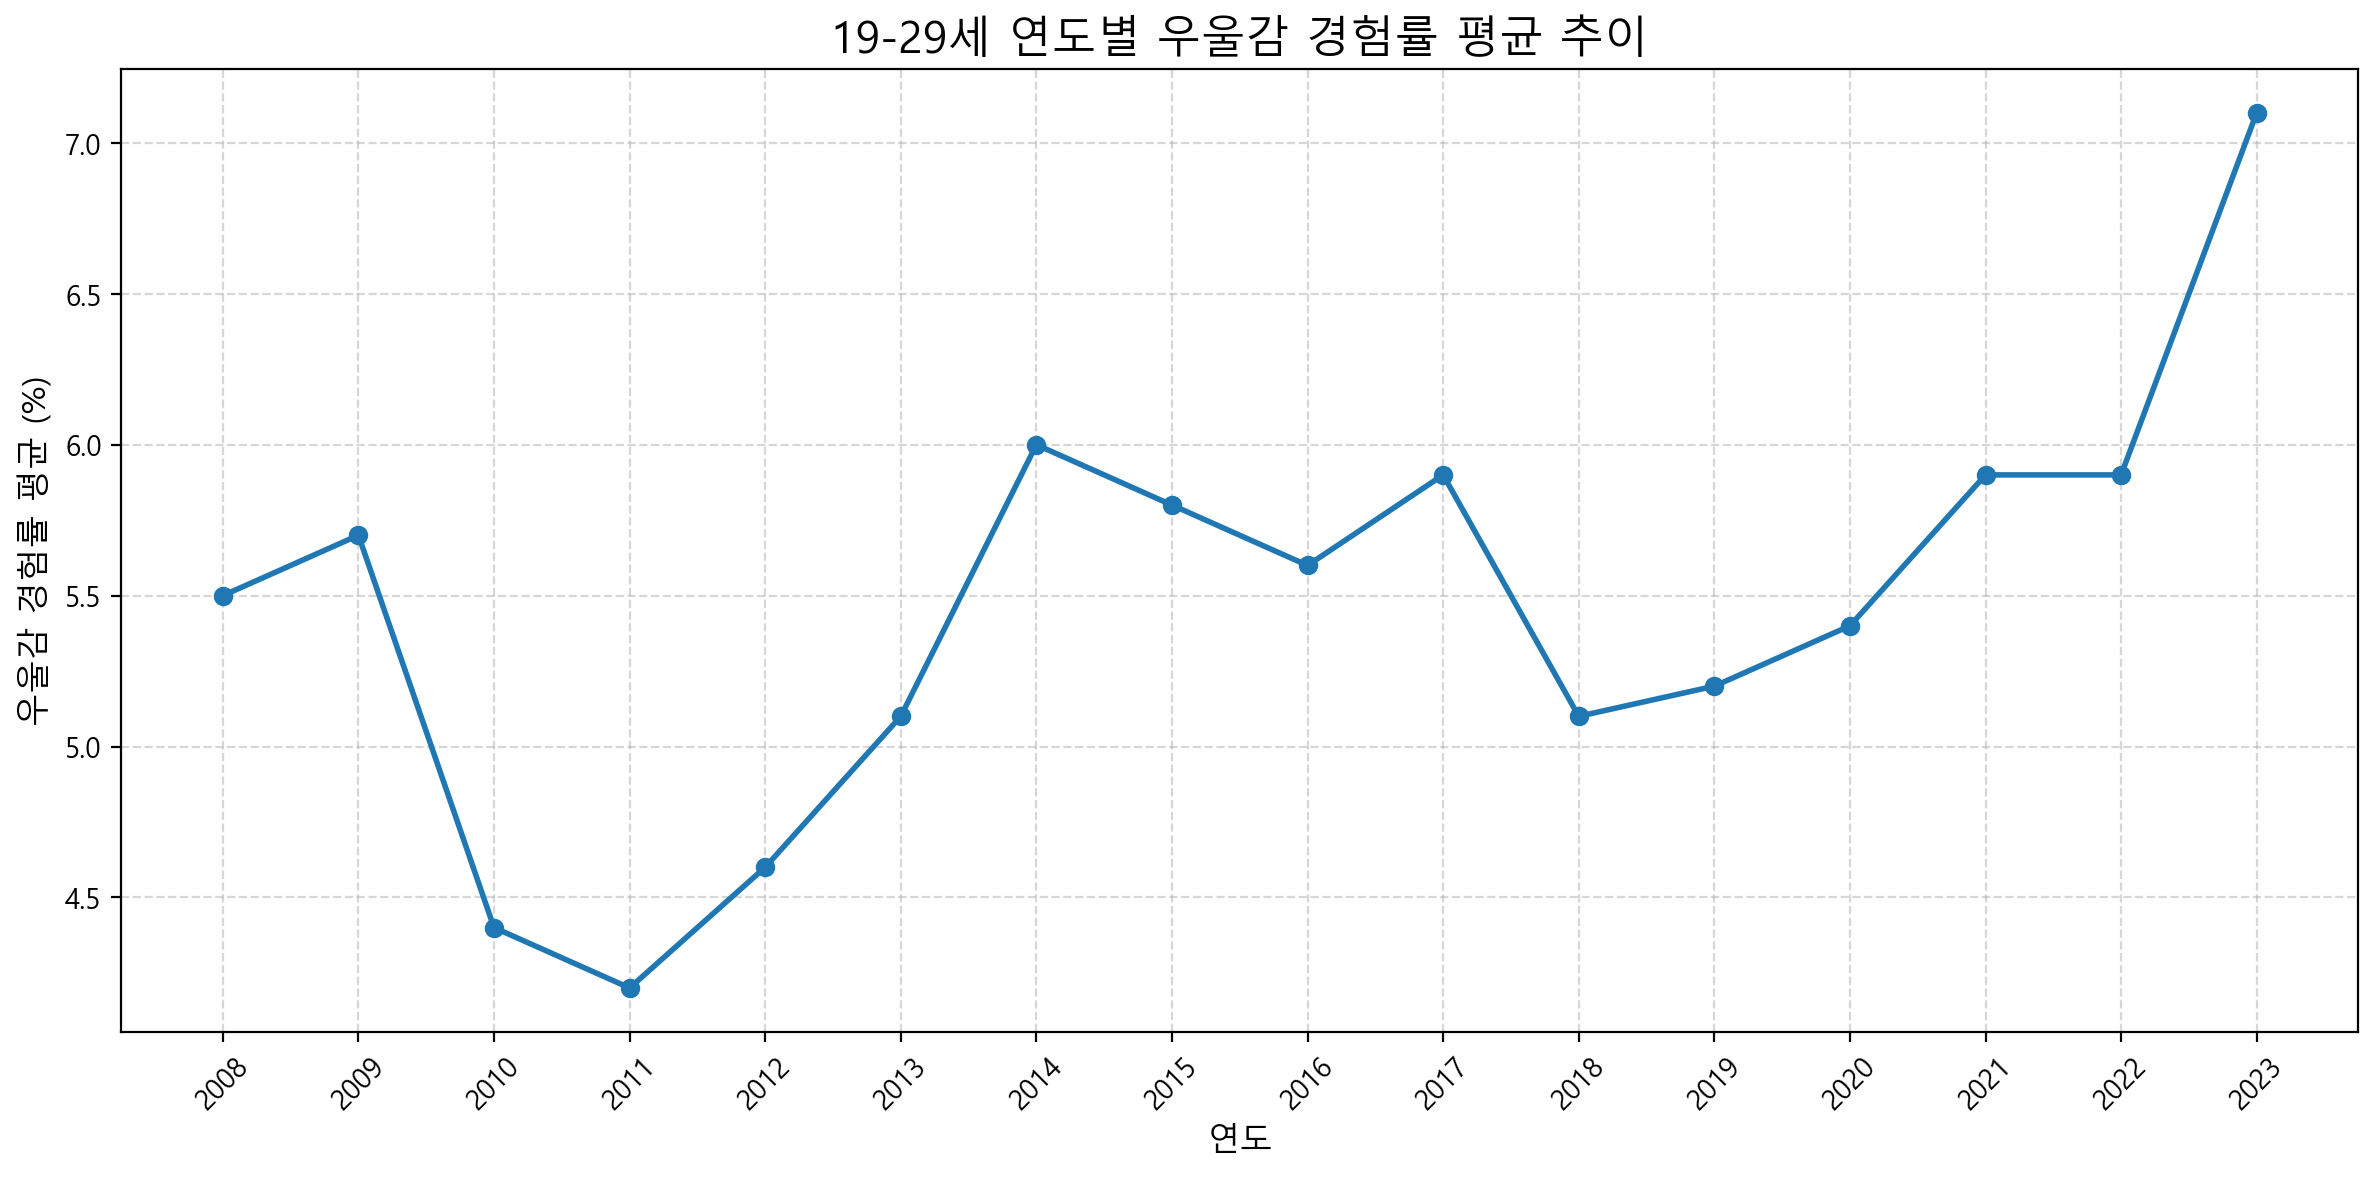

In [297]:
import matplotlib.pyplot as plt

# 선그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(연도별_평균_df['연도'], 연도별_평균_df['우울감경험률_평균'], marker='o', linestyle='-', linewidth=2)

plt.title('19-29세 연도별 우울감 경험률 평균 추이', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('우울감 경험률 평균 (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(연도별_평균_df['연도'], rotation=45)
plt.tight_layout()
plt.show()


# 상담경험률 통계

In [290]:


# CSV 파일 불러오기 (헤더 없이 전체 로딩)
정신상담_raw = pd.read_csv("data/정신상담경험.csv", header=None)

# 연도 정보가 있는 행 (예: '’22', '’23' 등)
columns_row = 정신상담_raw.iloc[7]
# 상담경험률(표준화율)이 들어 있는 행
상담경험률_row = 정신상담_raw.iloc[10]

# 연도별 상담률 딕셔너리 만들기
상담_연도별 = {}
for col, value in zip(columns_row, 상담경험률_row):
    if isinstance(col, str) and re.match(r"^’\d{2}$", col):  # ’22 → 2022
        try:
            year = int("20" + col[1:])  # '’22' → 2022
            if str(value).strip() not in ['-', '']:
                # 괄호 등 제거하고 숫자만 추출
                value_clean = float(re.findall(r"[\d\.]+", str(value))[0])
                상담_연도별[year] = value_clean
        except Exception as e:
            print(f"❗ 연도 {col} 처리 중 오류 발생:", e)

# 상담경험률 데이터프레임 생성
상담_df = pd.DataFrame({
    "연도": list(상담_연도별.keys()),
    "상담경험률_표준화": list(상담_연도별.values())
}).sort_values("연도").reset_index(drop=True)

# 확인
상담_df


,연도,상담경험률_표준화
0,2005,7.0
1,2007,2.0
2,2008,6.0
3,2009,7.0
4,2010,6.0
5,2011,6.0
6,2012,5.0
7,2015,5.0
8,2016,6.0
9,2017,6.0


In [291]:
상담_연도별 = {}

for idx in range(len(columns_row) - 1):
    col = columns_row[idx]
    next_col = columns_row[idx + 1]
    
    # 현재 열이 연도 형식이고, 다음 열이 (%) 비율이라면
    if isinstance(col, str) and re.match(r"^’\d{2}$", col):
        year = int("20" + col[1:])
        val = 정신상담_raw.iloc[target_index, idx + 1]  # 다음 열 = (%)
        if str(val).strip() not in ['-', '', 'nan']:
            try:
                cleaned = float(re.findall(r"[\d\.]+", str(val))[0])
                상담_연도별[year] = cleaned
            except:
                continue


상담_연도별







{2005: 1.4,
 2007: 1.6,
 2008: 1.7,
 2009: 2.4,
 2010: 3.0,
 2011: 3.1,
 2012: 2.3,
 2015: 2.6,
 2016: 3.1,
 2017: 4.2,
 2018: 3.5,
 2019: 4.7,
 2020: 4.9,
 2021: 4.2,
 2022: 7.4,
 2023: 8.5}

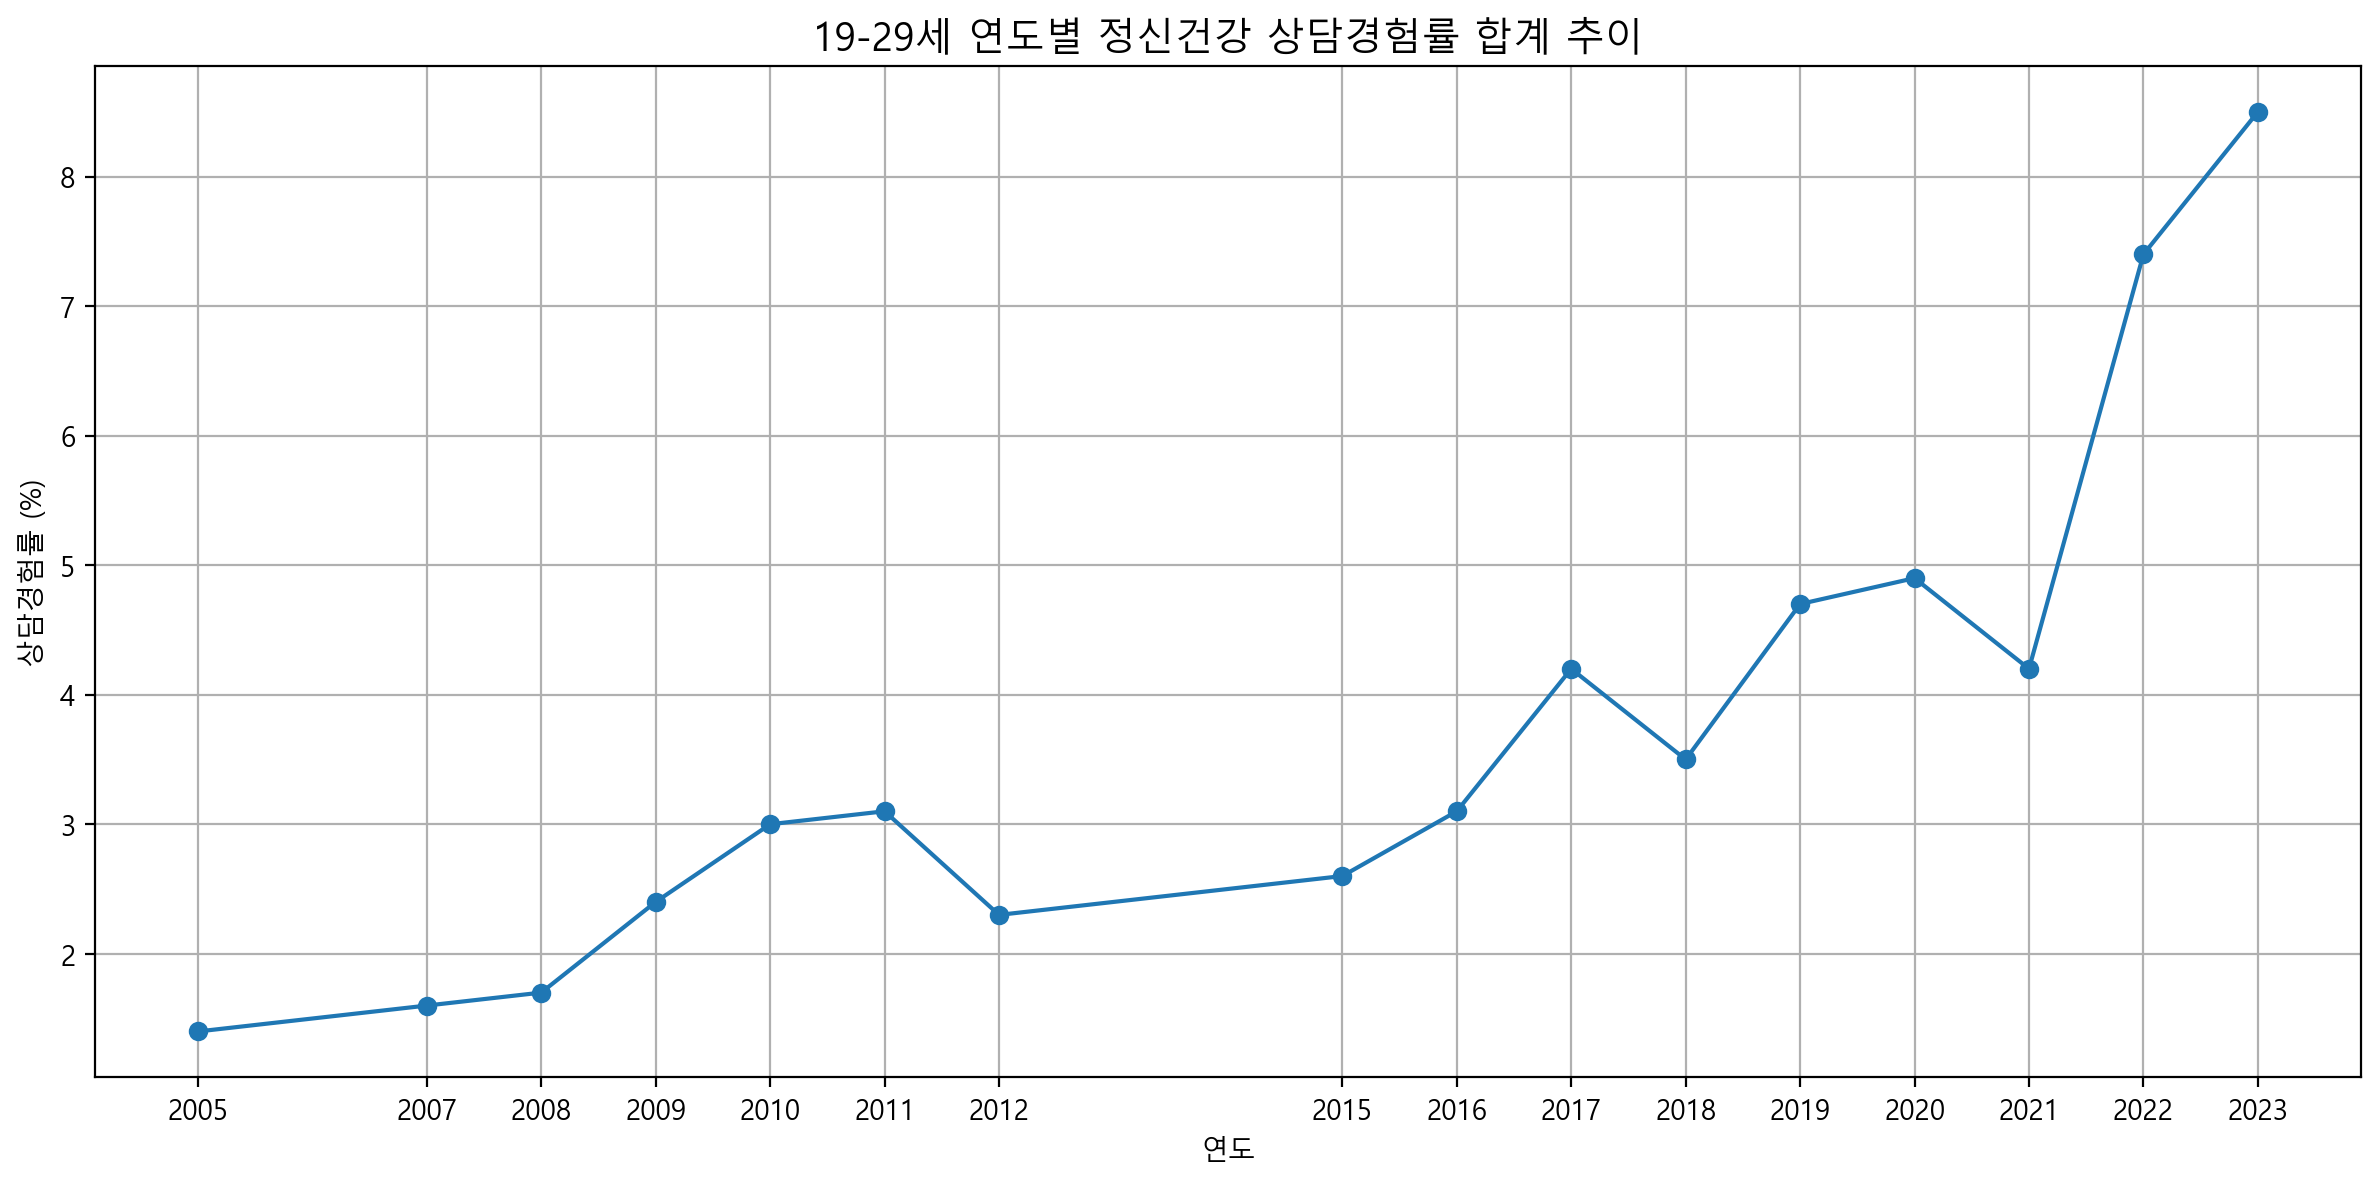

In [292]:
# 2008년부터의 데이터만 필터링
상담_청년_df_filtered = 상담_청년_df[상담_청년_df["연도"] >= 2008]

# 2. 선그래프 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(상담_청년_df["연도"], 상담_청년_df["19_29_상담경험률"], marker='o', linestyle='-')
plt.title("19-29세 연도별 정신건강 상담경험률 합계 추이", fontsize=14)
plt.xlabel("연도")
plt.ylabel("상담경험률 (%)")
plt.grid(True)
plt.xticks(상담_청년_df["연도"])
plt.tight_layout()
plt.show()


In [293]:
#우울감경험률과 상담경험률의 단위 확인
print(연도별_합계_df.dtypes)
상담_청년_df_filtered.dtypes

연도             int64
우울감경험률_합계    float64
dtype: object


연도               int64
19_29_상담경험률    float64
dtype: object

In [294]:
# 병합: 연도를 기준으로
merged_df = pd.merge(연도별_평균_df, 상담_청년_df_filtered, on='연도', how='inner')

# 편차 컬럼 추가
merged_df['경험률_편차'] = merged_df['우울감경험률_평균'] - merged_df['19_29_상담경험률']

# 확인
merged_df


,연도,우울감경험률_평균,19_29_상담경험률,경험률_편차
0,2008,5.5,1.7,3.8
1,2009,5.7,2.4,3.3
2,2010,4.4,3.0,1.4
3,2011,4.2,3.1,1.1
4,2012,4.6,2.3,2.3
5,2015,5.8,2.6,3.2
6,2016,5.6,3.1,2.5
7,2017,5.9,4.2,1.7
8,2018,5.1,3.5,1.6
9,2019,5.2,4.7,0.5


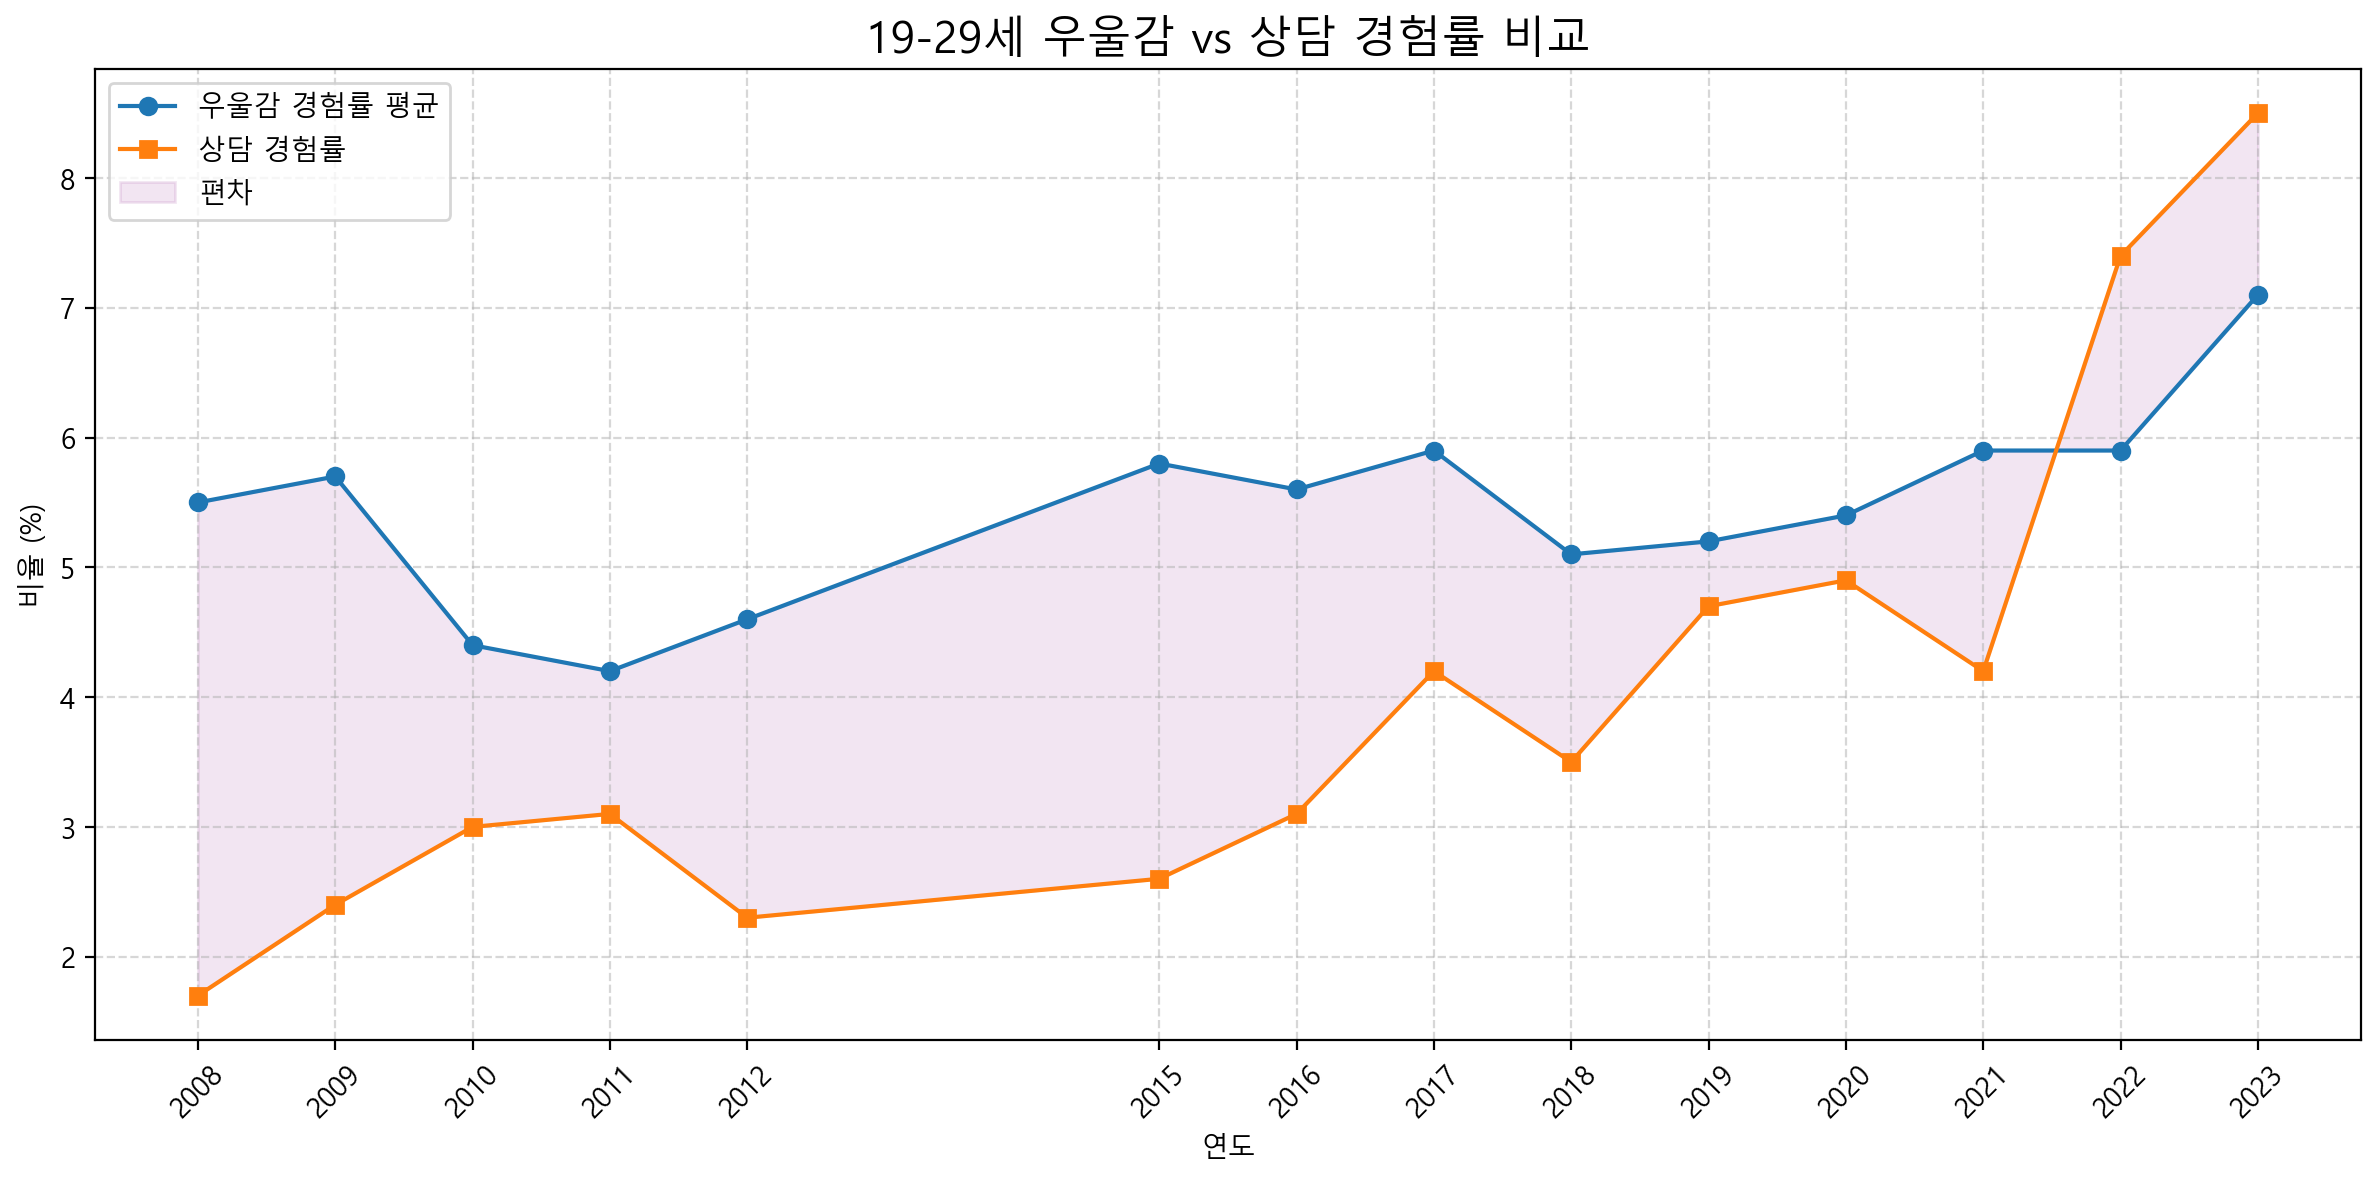

In [295]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 우울감 경험률 평균
plt.plot(merged_df['연도'], merged_df['우울감경험률_평균'], marker='o', label='우울감 경험률 평균')

# 상담 경험률
plt.plot(merged_df['연도'], merged_df['19_29_상담경험률'], marker='s', label='상담 경험률')

# 편차 영역 강조
plt.fill_between(merged_df['연도'], 
                 merged_df['우울감경험률_평균'], 
                 merged_df['19_29_상담경험률'], 
                 color='purple', alpha=0.1, label='편차')

plt.title('19-29세 우울감 vs 상담 경험률 비교', fontsize=16)
plt.xlabel('연도')
plt.ylabel('비율 (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(merged_df['연도'], rotation=45)
plt.tight_layout()
plt.show()


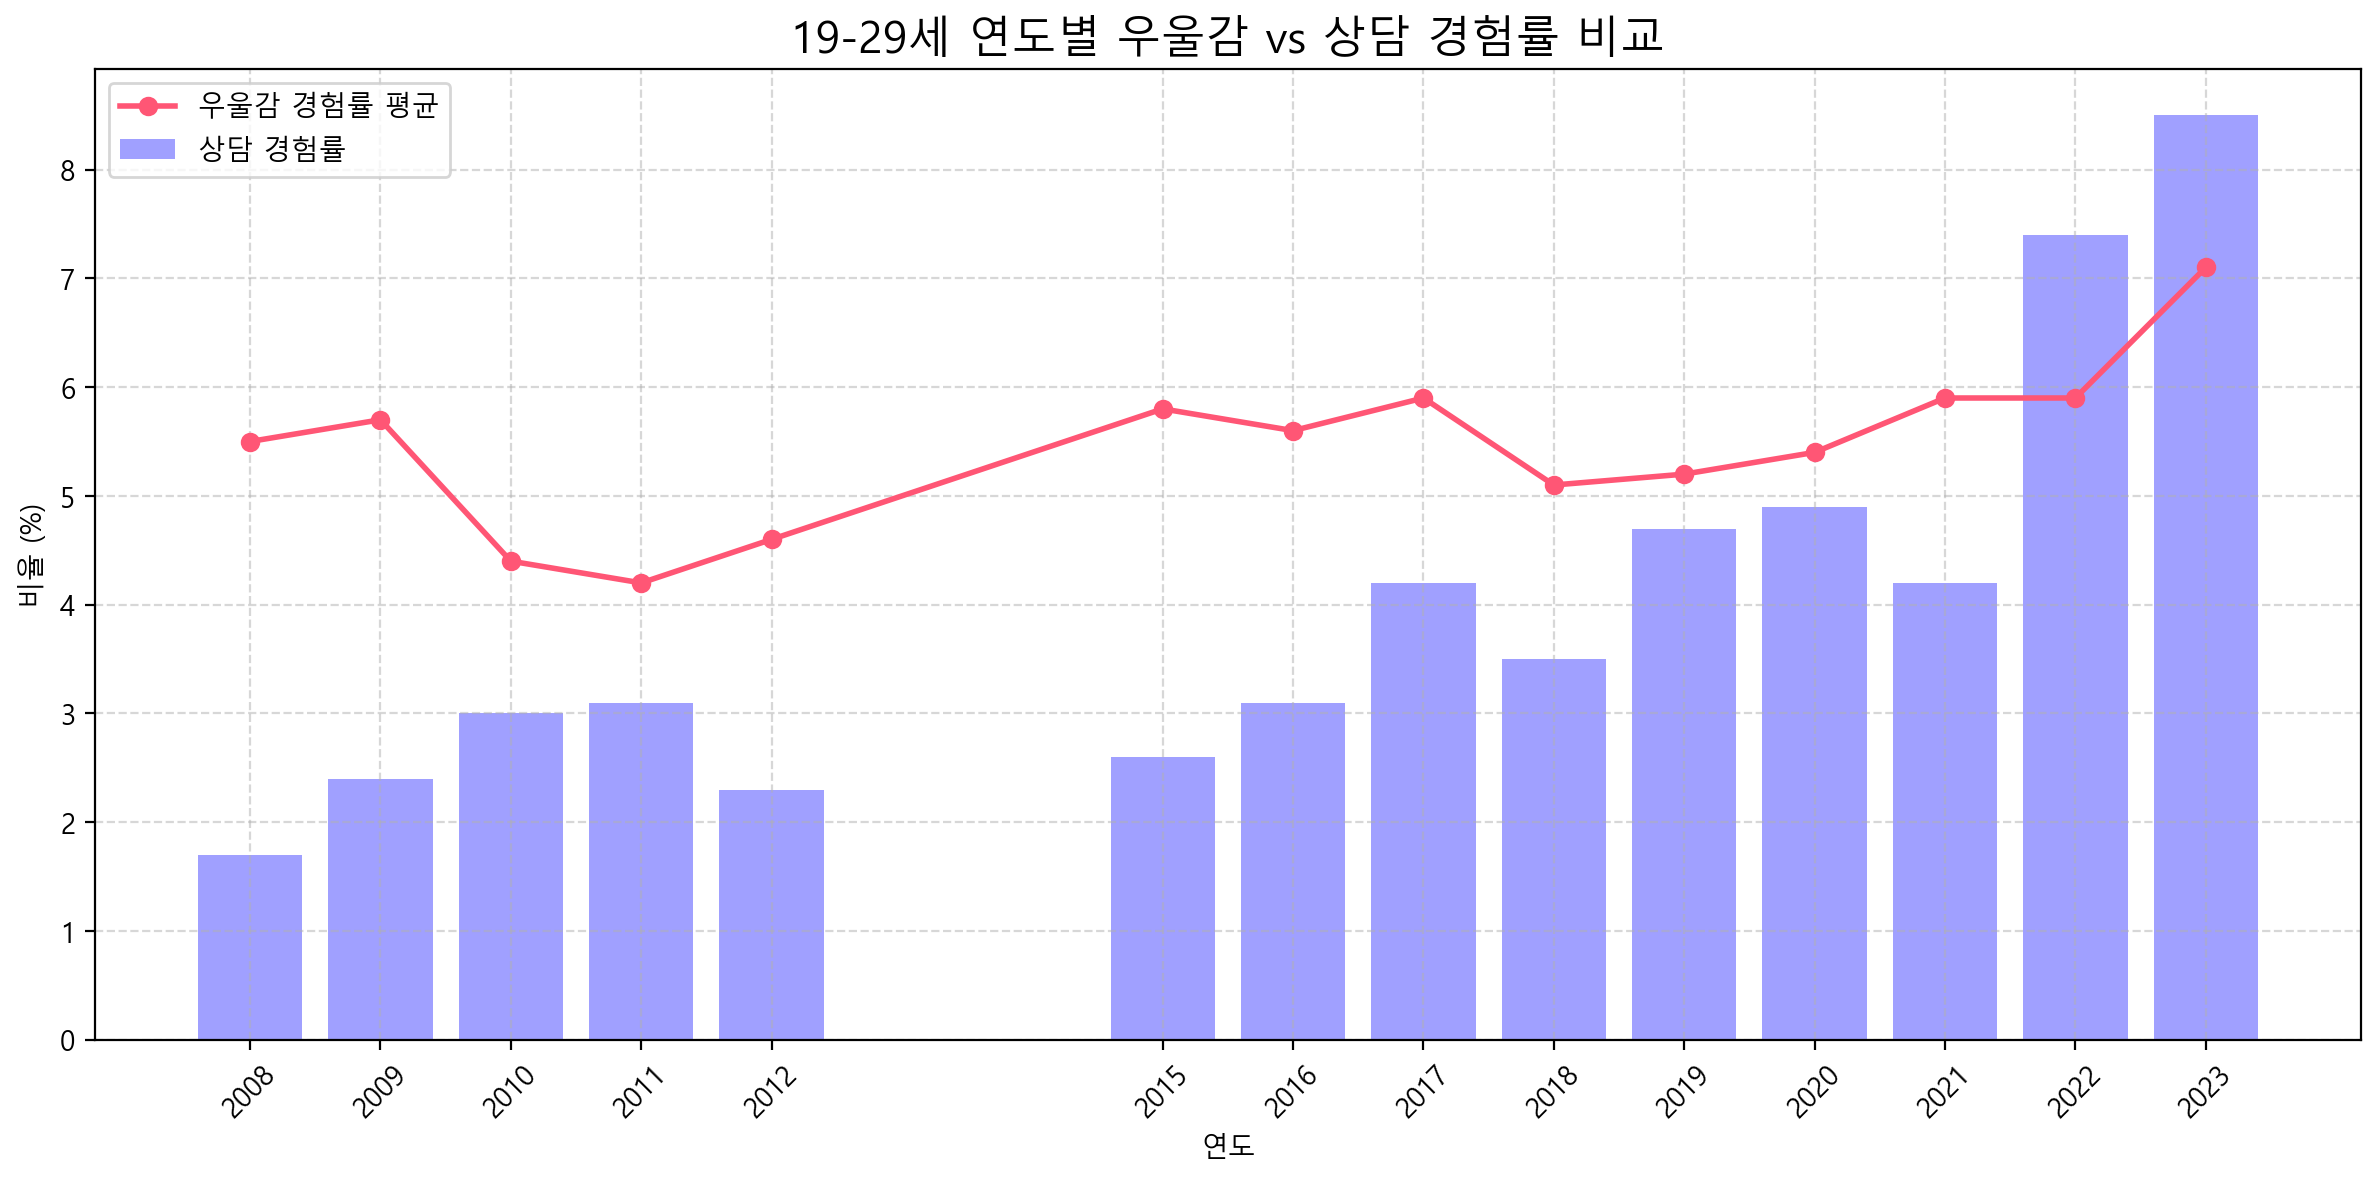

In [298]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 상담 경험률 막대그래프
plt.bar(merged_df['연도'], merged_df['19_29_상담경험률'], color='#A0A0FF', label='상담 경험률')

# 우울감 경험률 선그래프
plt.plot(merged_df['연도'], merged_df['우울감경험률_평균'], color='#FF5675', marker='o', linewidth=2, label='우울감 경험률 평균')

plt.title('19-29세 연도별 우울감 vs 상담 경험률 비교', fontsize=16)
plt.xlabel('연도')
plt.ylabel('비율 (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(merged_df['연도'], rotation=45)
plt.tight_layout()
plt.show()
